# 🔄 Notebook 4: Reti Neurali Ricorrenti (RNN)

**Impariamo a gestire sequenze con le reti neurali!** 🧠

## 🎯 Obiettivi di questo notebook:
- Comprendere il problema delle sequenze
- Implementare una RNN semplice da zero
- Esplorare LSTM e GRU
- Costruire un generatore di testo
- Confrontare prestazioni di diversi modelli
- Visualizzare il flusso di informazioni
- Applicare RNN a problemi reali

## ⏱️ Tempo stimato: 90-120 minuti

## 📋 Prerequisiti: 
- Notebook 1, 2, 3 completati
- Concetti base di reti neurali
- Familiarità con embeddings

## 🔧 Setup e Installazione

Installiamo le librerie necessarie per lavorare con le RNN:

In [2]:
# Installiamo le librerie necessarie
!pip install tensorflow keras numpy matplotlib seaborn pandas plotly
!pip install scikit-learn nltk wordcloud

# Importiamo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import random
import string

# TensorFlow e Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Librerie per NLP
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Visualizzazioni
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Download dati NLTK
nltk.download('punkt')

# Configurazione
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

print("✅ Setup completato! Pronti per esplorare le RNN.")
print(f"🔧 TensorFlow version: {tf.__version__}")

✅ Setup completato! Pronti per esplorare le RNN.
🔧 TensorFlow version: 2.20.0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANGELAANGUILANO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 🤔 Il Problema delle Sequenze

Prima di vedere le RNN, capiamo perché le reti neurali tradizionali non funzionano bene con le sequenze:

🤔 IL PROBLEMA DELLE SEQUENZE

📊 ESEMPI DI DATI SEQUENZIALI:

Testo:
   1. Il gatto dorme
   2. Dorme il gatto
   3. Gatto il dorme

Serie Temporali:
   1. [10, 15, 20, 25, 30]
   2. [30, 25, 20, 15, 10]
   3. [10, 30, 15, 25, 20]

DNA:
   1. ATCG
   2. CGTA
   3. TACG

❌ PROBLEMI RETI NEURALI TRADIZIONALI:
   🔢 Input di lunghezza fissa
   🚫 Non considera l'ordine
   💭 Nessuna memoria del passato
   📏 Difficile gestire sequenze lunghe
   🔄 Non può processare sequenze di lunghezza variabile


C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\2416872949.py:84: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\2416872949.py:84: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


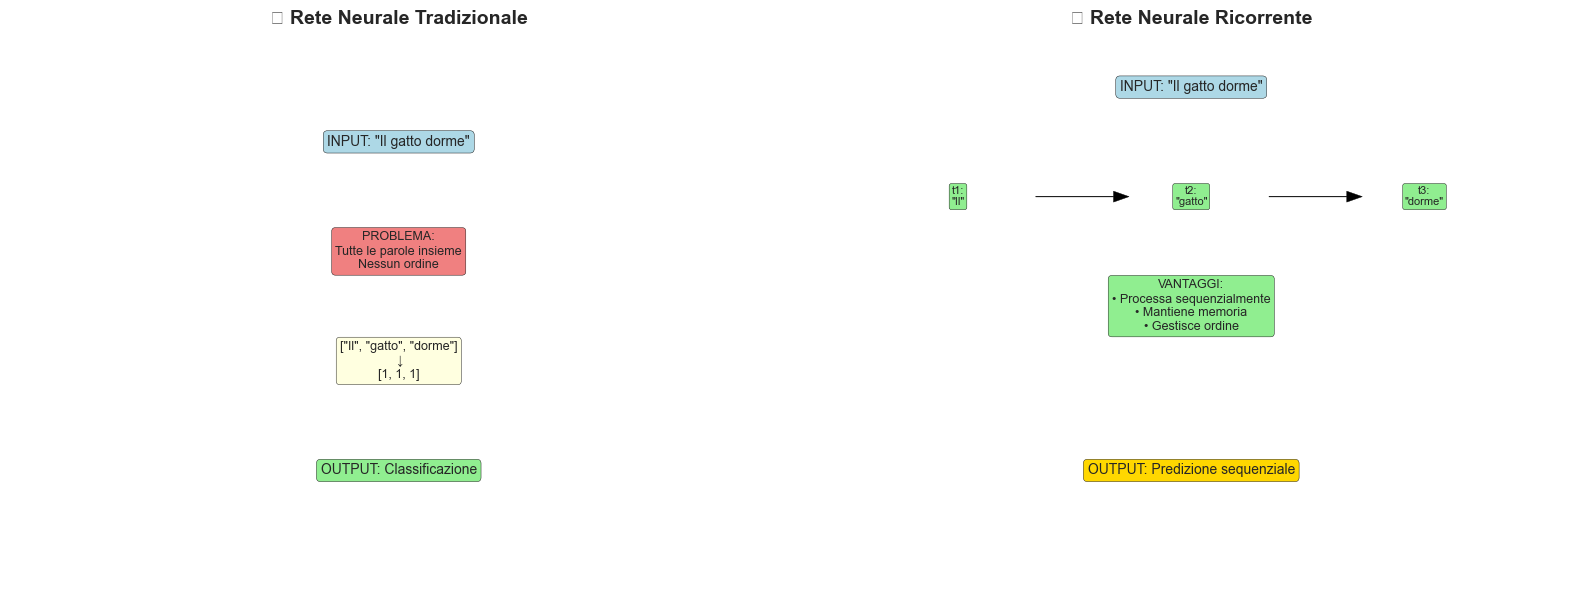


💡 PERCHÉ LE RNN SONO IMPORTANTI:
   🔄 Processano sequenze passo dopo passo
   💭 Mantengono memoria degli stati precedenti
   📏 Gestiscono lunghezze variabili
   🎯 Catturano dipendenze temporali
   🔗 Collegano passato e presente

🎯 APPLICAZIONI TIPICHE:
   📝 Generazione di testo
   🗣️ Riconoscimento vocale
   🌐 Traduzione automatica
   📈 Previsioni serie temporali
   🎵 Composizione musicale
   💬 Chatbot e assistenti


In [3]:
# Il problema delle sequenze
print("🤔 IL PROBLEMA DELLE SEQUENZE\n")

# Esempi di dati sequenziali
esempi_sequenze = {
    'Testo': [
        "Il gatto dorme",
        "Dorme il gatto",  # Stesso significato, ordine diverso
        "Gatto il dorme"   # Ordine sbagliato
    ],
    'Serie Temporali': [
        [10, 15, 20, 25, 30],  # Trend crescente
        [30, 25, 20, 15, 10],  # Trend decrescente
        [10, 30, 15, 25, 20]   # Casuale
    ],
    'DNA': [
        "ATCG",
        "CGTA",  # Sequenza diversa
        "TACG"   # Altra sequenza
    ]
}

print("📊 ESEMPI DI DATI SEQUENZIALI:")
for tipo, esempi in esempi_sequenze.items():
    print(f"\n{tipo}:")
    for i, esempio in enumerate(esempi, 1):
        print(f"   {i}. {esempio}")

# Problema con reti neurali tradizionali
print("\n❌ PROBLEMI RETI NEURALI TRADIZIONALI:")
problemi = [
    "🔢 Input di lunghezza fissa",
    "🚫 Non considera l'ordine",
    "💭 Nessuna memoria del passato",
    "📏 Difficile gestire sequenze lunghe",
    "🔄 Non può processare sequenze di lunghezza variabile"
]

for problema in problemi:
    print(f"   {problema}")

# Visualizzazione del problema
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Rete neurale tradizionale
ax1.set_title('🚫 Rete Neurale Tradizionale', fontsize=14, fontweight='bold')
ax1.text(0.5, 0.8, 'INPUT: "Il gatto dorme"', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"), fontsize=10)
ax1.text(0.5, 0.6, 'PROBLEMA:\nTutte le parole insieme\nNessun ordine', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"), fontsize=9)
ax1.text(0.5, 0.4, '["Il", "gatto", "dorme"]\n↓\n[1, 1, 1]', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"), fontsize=9)
ax1.text(0.5, 0.2, 'OUTPUT: Classificazione', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"), fontsize=10)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# Rete neurale ricorrente
ax2.set_title('✅ Rete Neurale Ricorrente', fontsize=14, fontweight='bold')
ax2.text(0.5, 0.9, 'INPUT: "Il gatto dorme"', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"), fontsize=10)

# Sequenza temporale
parole = ["Il", "gatto", "dorme"]
y_pos = 0.7
for i, parola in enumerate(parole):
    x_pos = 0.2 + i * 0.3
    ax2.text(x_pos, y_pos, f't{i+1}:\n"{parola}"', ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="lightgreen"), fontsize=8)
    if i < len(parole) - 1:
        ax2.arrow(x_pos + 0.1, y_pos, 0.1, 0, head_width=0.02, head_length=0.02, 
                 fc='black', ec='black')

ax2.text(0.5, 0.5, 'VANTAGGI:\n• Processa sequenzialmente\n• Mantiene memoria\n• Gestisce ordine', 
         ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"), fontsize=9)
ax2.text(0.5, 0.2, 'OUTPUT: Predizione sequenziale', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="gold"), fontsize=10)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\n💡 PERCHÉ LE RNN SONO IMPORTANTI:")
vantaggi = [
    "🔄 Processano sequenze passo dopo passo",
    "💭 Mantengono memoria degli stati precedenti",
    "📏 Gestiscono lunghezze variabili",
    "🎯 Catturano dipendenze temporali",
    "🔗 Collegano passato e presente"
]

for vantaggio in vantaggi:
    print(f"   {vantaggio}")

print("\n🎯 APPLICAZIONI TIPICHE:")
applicazioni = [
    "📝 Generazione di testo",
    "🗣️ Riconoscimento vocale",
    "🌐 Traduzione automatica",
    "📈 Previsioni serie temporali",
    "🎵 Composizione musicale",
    "💬 Chatbot e assistenti"
]

for app in applicazioni:
    print(f"   {app}")

## 🔄 RNN Semplice - Implementazione da Zero

Implementiamo una RNN semplice per capire come funziona internamente:

🔄 RNN SEMPLICE - IMPLEMENTAZIONE DA ZERO

📊 ARCHITETTURA RNN:
   Input size: 5
   Hidden size: 10
   Output size: 5

🔤 SEQUENZA INPUT: 3 passi temporali

📈 RISULTATI:
   Tempo 1:
     Output shape: (5, 1)
     Hidden shape: (10, 1)
     Output probs: [0.19997294 0.19998775 0.19994555]... (primi 3)
   Tempo 2:
     Output shape: (5, 1)
     Hidden shape: (10, 1)
     Output probs: [0.20007103 0.20004629 0.19991465]... (primi 3)
   Tempo 3:
     Output shape: (5, 1)
     Hidden shape: (10, 1)
     Output probs: [0.2000291  0.19994571 0.20001689]... (primi 3)


C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\2955173604.py:146: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\2955173604.py:146: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\2955173604.py:146: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ANGELAANGUILAN

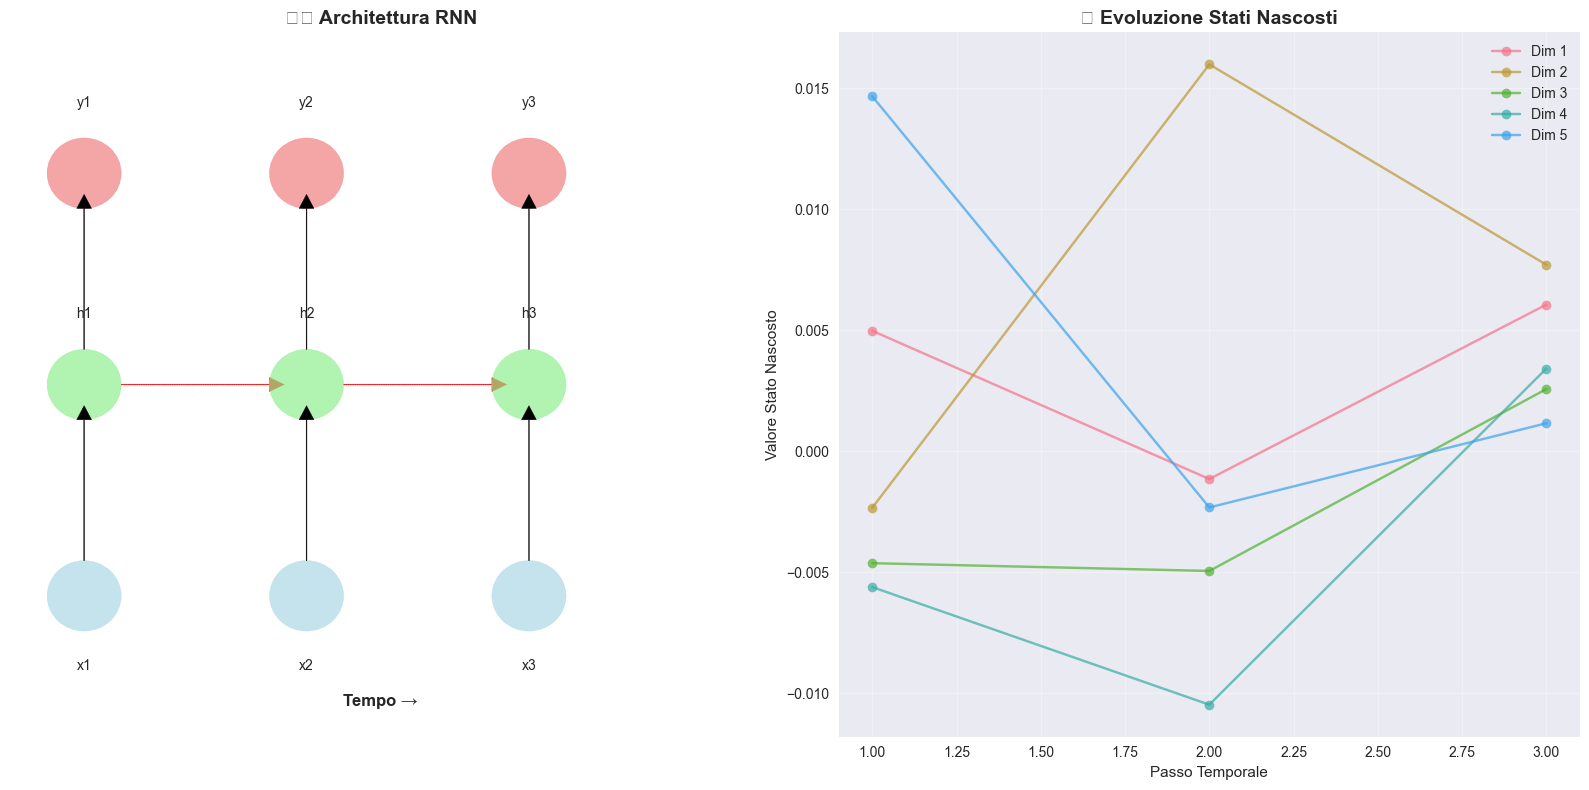


💡 OSSERVAZIONI:
   • Ogni passo temporale usa l'output del precedente
   • Lo stato nascosto 'ricorda' informazioni passate
   • L'output dipende da tutta la sequenza precedente
   • I pesi sono condivisi tra tutti i passi temporali

🔍 EQUAZIONI RNN:
   h_t = tanh(W_xh * x_t + W_hh * h_{t-1} + b_h)
   y_t = W_hy * h_t + b_y
   
   Dove:
   • h_t: stato nascosto al tempo t
   • x_t: input al tempo t
   • y_t: output al tempo t
   • W: matrici dei pesi
   • b: vettori di bias


In [4]:
# Implementazione RNN semplice da zero
class RNNSemplice:
    def __init__(self, input_size, hidden_size, output_size):
        """Inizializza una RNN semplice"""
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Inizializzazione pesi (piccoli valori casuali)
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01  # input -> hidden
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # hidden -> hidden
        self.Why = np.random.randn(output_size, hidden_size) * 0.01  # hidden -> output
        
        # Bias
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
        
        # Stato nascosto iniziale
        self.h = np.zeros((hidden_size, 1))
    
    def tanh(self, x):
        """Funzione di attivazione tanh"""
        return np.tanh(x)
    
    def softmax(self, x):
        """Funzione softmax per output"""
        exp_x = np.exp(x - np.max(x))
        return exp_x / np.sum(exp_x)
    
    def forward_step(self, x):
        """Un passo forward della RNN"""
        # x: input al tempo t (vettore colonna)
        # h: stato nascosto precedente
        
        # Calcola nuovo stato nascosto
        self.h = self.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, self.h) + self.bh)
        
        # Calcola output
        y = np.dot(self.Why, self.h) + self.by
        p = self.softmax(y)
        
        return p, self.h.copy()
    
    def forward_sequence(self, inputs):
        """Processa una sequenza completa"""
        outputs = []
        hidden_states = []
        
        # Reset stato nascosto
        self.h = np.zeros((self.hidden_size, 1))
        
        for x in inputs:
            p, h = self.forward_step(x)
            outputs.append(p)
            hidden_states.append(h)
        
        return outputs, hidden_states

# Test della RNN semplice
print("🔄 RNN SEMPLICE - IMPLEMENTAZIONE DA ZERO\n")

# Parametri
input_size = 5   # Dimensione vocabolario (esempio)
hidden_size = 10 # Dimensione stato nascosto
output_size = 5  # Dimensione output (stesso del vocabolario)

# Crea RNN
rnn = RNNSemplice(input_size, hidden_size, output_size)

print(f"📊 ARCHITETTURA RNN:")
print(f"   Input size: {input_size}")
print(f"   Hidden size: {hidden_size}")
print(f"   Output size: {output_size}")

# Sequenza di input di esempio (one-hot encoding)
sequenza_input = [
    np.array([[1], [0], [0], [0], [0]]),  # parola 0
    np.array([[0], [1], [0], [0], [0]]),  # parola 1
    np.array([[0], [0], [1], [0], [0]]),  # parola 2
]

print(f"\n🔤 SEQUENZA INPUT: {len(sequenza_input)} passi temporali")

# Processa la sequenza
outputs, hidden_states = rnn.forward_sequence(sequenza_input)

print(f"\n📈 RISULTATI:")
for t, (output, hidden) in enumerate(zip(outputs, hidden_states)):
    print(f"   Tempo {t+1}:")
    print(f"     Output shape: {output.shape}")
    print(f"     Hidden shape: {hidden.shape}")
    print(f"     Output probs: {output.flatten()[:3]}... (primi 3)")

# Visualizzazione dell'architettura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Diagramma architettura
ax1.set_title('🏗️ Architettura RNN', fontsize=14, fontweight='bold')

# Disegna i nodi
time_steps = 3
for t in range(time_steps):
    x_pos = t * 0.3 + 0.1
    
    # Input
    ax1.add_patch(plt.Circle((x_pos, 0.2), 0.05, color='lightblue', alpha=0.7))
    ax1.text(x_pos, 0.1, f'x{t+1}', ha='center', va='center', fontsize=10)
    
    # Hidden state
    ax1.add_patch(plt.Circle((x_pos, 0.5), 0.05, color='lightgreen', alpha=0.7))
    ax1.text(x_pos, 0.6, f'h{t+1}', ha='center', va='center', fontsize=10)
    
    # Output
    ax1.add_patch(plt.Circle((x_pos, 0.8), 0.05, color='lightcoral', alpha=0.7))
    ax1.text(x_pos, 0.9, f'y{t+1}', ha='center', va='center', fontsize=10)
    
    # Connessioni
    ax1.arrow(x_pos, 0.25, 0, 0.2, head_width=0.02, head_length=0.02, fc='black', ec='black')
    ax1.arrow(x_pos, 0.55, 0, 0.2, head_width=0.02, head_length=0.02, fc='black', ec='black')
    
    # Connessione ricorrente
    if t < time_steps - 1:
        ax1.arrow(x_pos + 0.05, 0.5, 0.2, 0, head_width=0.02, head_length=0.02, 
                 fc='red', ec='red', linestyle='--')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')
ax1.text(0.5, 0.05, 'Tempo →', ha='center', va='center', fontsize=12, fontweight='bold')

# Evoluzione stati nascosti
ax2.set_title('📊 Evoluzione Stati Nascosti', fontsize=14, fontweight='bold')

# Estrai alcune dimensioni degli stati nascosti
hidden_evolution = np.array([h.flatten()[:5] for h in hidden_states])  # Prime 5 dimensioni

for i in range(5):
    ax2.plot(range(1, len(hidden_states)+1), hidden_evolution[:, i], 
             marker='o', label=f'Dim {i+1}', alpha=0.7)

ax2.set_xlabel('Passo Temporale')
ax2.set_ylabel('Valore Stato Nascosto')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 OSSERVAZIONI:")
print("   • Ogni passo temporale usa l'output del precedente")
print("   • Lo stato nascosto 'ricorda' informazioni passate")
print("   • L'output dipende da tutta la sequenza precedente")
print("   • I pesi sono condivisi tra tutti i passi temporali")

print("\n🔍 EQUAZIONI RNN:")
print("   h_t = tanh(W_xh * x_t + W_hh * h_{t-1} + b_h)")
print("   y_t = W_hy * h_t + b_y")
print("   \n   Dove:")
print("   • h_t: stato nascosto al tempo t")
print("   • x_t: input al tempo t")
print("   • y_t: output al tempo t")
print("   • W: matrici dei pesi")
print("   • b: vettori di bias")

## 📝 Generatore di Testo con RNN

Costruiamo un generatore di testo semplice per vedere le RNN in azione:

📝 GENERATORE DI TESTO CON RNN

📚 CORPUS: 40 parole
Prime 10 parole: ['il', 'gatto', 'dorme', 'sul', 'divano', 'il', 'cane', 'corre', 'nel', 'parco']

📖 VOCABOLARIO: 35 parole uniche
Vocabolario: ['animali', 'bella', 'cane', 'corre', 'danzano', 'di', 'divano', 'dolcemente', 'dorme', 'felici', 'fiori', 'foglie', 'gatto', 'gentilmente', 'gli', 'i', 'il', 'la', 'le', 'luminoso', 'meraviglie', 'mondo', 'natura', 'nel', 'parco', 'pieno', 'preziosa', 'profumano', 'soffia', 'sole', 'sono', 'splende', 'sul', 'vento', 'vita']

🎯 SEQUENZE DI TRAINING: 37
Esempi:
   Input: ['il', 'gatto', 'dorme'] → Target: sul
   Input: ['gatto', 'dorme', 'sul'] → Target: divano
   Input: ['dorme', 'sul', 'divano'] → Target: il
   Input: ['sul', 'divano', 'il'] → Target: cane
   Input: ['divano', 'il', 'cane'] → Target: corre

📊 DATI PREPARATI:
   X shape: (37, 3, 35) (samples, time_steps, features)
   y shape: (37, 35) (samples, features)

🏗️ COSTRUZIONE MODELLO RNN:
📋 ARCHITETTURA MODELLO:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           4,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 35)                  │           1,785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,085 (23.77 KB)

 Trainable params: 6,085 (23.77 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ ADDESTRAMENTO...
✅ Addestramento completato!


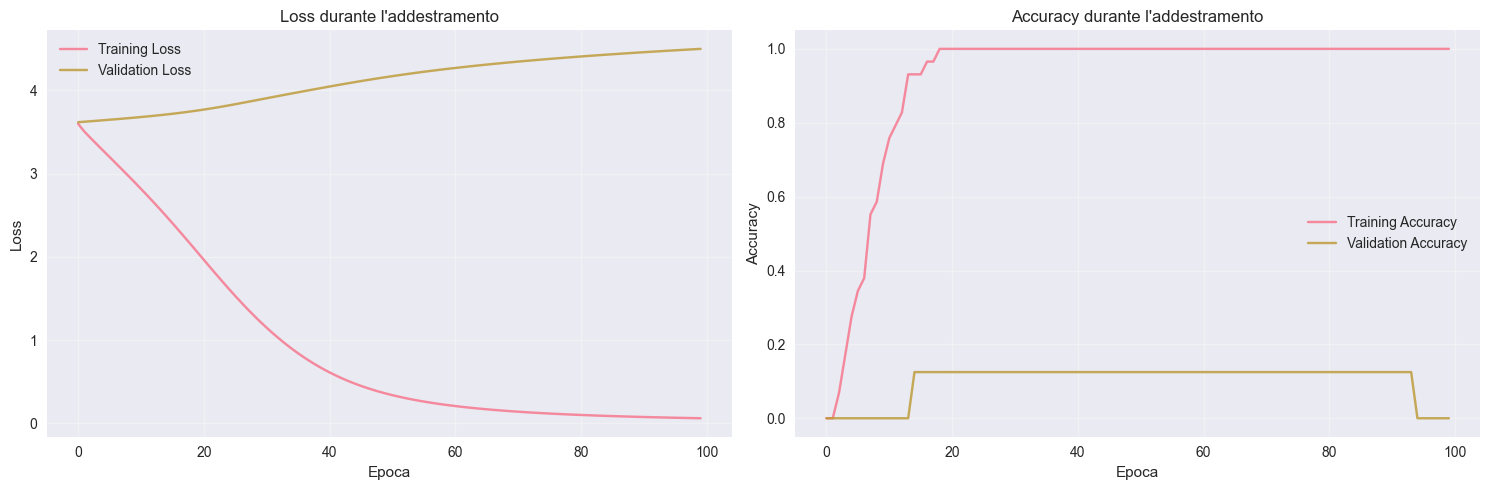


🎨 GENERAZIONE DI TESTO:

🌱 Seed: il gatto dorme
   Temp 0.5: il gatto dorme sul divano il cane corre nel parco
   Temp 1.0: il gatto dorme sul divano il cane corre nel parco
   Temp 1.5: il gatto dorme parco natura gatto bella vento animali le

🌱 Seed: il vento soffia
   Temp 0.5: il vento soffia gentilmente le foglie danzano il gli splende
   Temp 1.0: il vento soffia gentilmente le foglie danzano animali luminoso bella
   Temp 1.5: il vento soffia gentilmente le luminoso danzano bella felici parco

🌱 Seed: il sole splende
   Temp 0.5: il sole splende luminoso i fiori profumano dolcemente la natura
   Temp 1.0: il sole splende luminoso i sono profumano dolcemente sole natura
   Temp 1.5: il sole splende vento i fiori di il la le

💡 OSSERVAZIONI:
   • Temperature bassa (0.5): Più conservativo, ripete pattern
   • Temperature media (1.0): Bilanciato
   • Temperature alta (1.5): Più creativo, meno coerente
   • Il modello ha imparato alcune strutture linguistiche base


In [11]:
# Generatore di testo con RNN
print("📝 GENERATORE DI TESTO CON RNN\n")

# Testo di esempio per l'addestramento
testo_training = """
Il gatto dorme sul divano. Il cane corre nel parco. 
Gli animali sono felici. Il sole splende luminoso.
I fiori profumano dolcemente. La natura è bella.
Il vento soffia gentilmente. Le foglie danzano.
Il mondo è pieno di meraviglie. La vita è preziosa.
"""

# Preprocessing del testo
def preprocess_text(text):
    """Pulisce e prepara il testo"""
    # Converti in minuscolo e rimuovi caratteri speciali
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizza
    words = text.split()
    return words

# Prepara i dati
words = preprocess_text(testo_training)
print(f"📚 CORPUS: {len(words)} parole")
print(f"Prime 10 parole: {words[:10]}")

# Crea vocabolario
vocab = sorted(list(set(words)))
vocab_size = len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

print(f"\n📖 VOCABOLARIO: {vocab_size} parole uniche")
print(f"Vocabolario: {vocab}")

# Crea sequenze di training
def create_training_sequences(words, seq_length=3):
    """Crea sequenze input-target per l'addestramento"""
    sequences = []
    targets = []
    
    for i in range(len(words) - seq_length):
        seq = words[i:i + seq_length]
        target = words[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    
    return sequences, targets

seq_length = 3
sequences, targets = create_training_sequences(words, seq_length)

print(f"\n🎯 SEQUENZE DI TRAINING: {len(sequences)}")
print("Esempi:")
for i in range(min(5, len(sequences))):
    print(f"   Input: {sequences[i]} → Target: {targets[i]}")

# Converti in formato numerico
def words_to_indices(word_list, word_to_ix):
    """Converte parole in indici"""
    return [word_to_ix[word] for word in word_list]

def create_one_hot(index, vocab_size):
    """Crea vettore one-hot"""
    vector = np.zeros(vocab_size)
    vector[index] = 1
    return vector

# Prepara dati per RNN
X = []
y = []

for seq, target in zip(sequences, targets):
    # Converti sequenza in one-hot
    seq_indices = words_to_indices(seq, word_to_ix)
    seq_one_hot = [create_one_hot(idx, vocab_size) for idx in seq_indices]
    
    # Target
    target_idx = word_to_ix[target]
    target_one_hot = create_one_hot(target_idx, vocab_size)
    
    X.append(seq_one_hot)
    y.append(target_one_hot)

X = np.array(X)
y = np.array(y)

print(f"\n📊 DATI PREPARATI:")
print(f"   X shape: {X.shape} (samples, time_steps, features)")
print(f"   y shape: {y.shape} (samples, features)")

# Costruisci modello RNN con Keras
print("\n🏗️ COSTRUZIONE MODELLO RNN:")

model = models.Sequential([
    layers.SimpleRNN(50, input_shape=(seq_length, vocab_size), 
                     activation='tanh', return_sequences=False),
    layers.Dense(vocab_size, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("📋 ARCHITETTURA MODELLO:")
model.summary()

# Addestramento
print("\n🏋️ ADDESTRAMENTO...")
history = model.fit(
    X, y,
    epochs=100,
    batch_size=8,
    verbose=0,  # Silenzioso per non intasare l'output
    validation_split=0.2
)

print("✅ Addestramento completato!")

# Visualizza training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss
ax1.plot(history.history['loss'], label='Training Loss', alpha=0.8)
ax1.plot(history.history['val_loss'], label='Validation Loss', alpha=0.8)
ax1.set_title('Loss durante l\'addestramento')
ax1.set_xlabel('Epoca')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', alpha=0.8)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', alpha=0.8)
ax2.set_title('Accuracy durante l\'addestramento')
ax2.set_xlabel('Epoca')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Funzione per generare testo
def generate_text(model, seed_text, num_words=10, temperature=1.0):
    """Genera testo usando il modello addestrato"""
    generated = seed_text.copy()
    
    for _ in range(num_words):
        # Prepara input (ultime seq_length parole)
        current_seq = generated[-seq_length:]
        
        # Converti in one-hot
        seq_indices = words_to_indices(current_seq, word_to_ix)
        seq_one_hot = np.array([[create_one_hot(idx, vocab_size) for idx in seq_indices]])
        
        # Predici prossima parola
        predictions = model.predict(seq_one_hot, verbose=0)[0]
        
        # Applica temperature per controllare la creatività
        predictions = np.log(predictions + 1e-8) / temperature
        predictions = np.exp(predictions)
        predictions = predictions / np.sum(predictions)
        
        # Campiona prossima parola
        next_word_idx = np.random.choice(len(predictions), p=predictions)
        next_word = ix_to_word[next_word_idx]
        
        generated.append(next_word)
    
    return generated

# Test generazione
print("\n🎨 GENERAZIONE DI TESTO:")

seed_texts = [
    ["il", "gatto", "dorme"],
    ["il", "vento", "soffia"],
    ["il", "sole", "splende"]
]

temperatures = [0.5, 1.0, 1.5]

for seed in seed_texts:
    print(f"\n🌱 Seed: {' '.join(seed)}")
    
    for temp in temperatures:
        generated = generate_text(model, seed.copy(), num_words=7, temperature=temp)
        print(f"   Temp {temp}: {' '.join(generated)}")

print("\n💡 OSSERVAZIONI:")
print("   • Temperature bassa (0.5): Più conservativo, ripete pattern")
print("   • Temperature media (1.0): Bilanciato")
print("   • Temperature alta (1.5): Più creativo, meno coerente")
print("   • Il modello ha imparato alcune strutture linguistiche base")

## 🧠 LSTM - Memoria a Lungo Termine

Le RNN semplici soffrono del problema del **vanishing gradient**. Le **LSTM** risolvono questo problema:

🧠 LSTM - LONG SHORT-TERM MEMORY

❌ PROBLEMA RNN SEMPLICI:
   📉 Vanishing gradient: gradienti diventano troppo piccoli
   💭 Memoria a breve termine: dimentica informazioni lontane
   🔄 Difficoltà con sequenze lunghe
   ⚡ Instabilità durante l'addestramento

✅ SOLUZIONE LSTM:
   🚪 Gates (porte) per controllare il flusso di informazioni
   💾 Cell state per memoria a lungo termine
   🔄 Forget gate: decide cosa dimenticare
   📥 Input gate: decide cosa memorizzare
   📤 Output gate: decide cosa emettere


C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\419241450.py:74: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\419241450.py:74: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


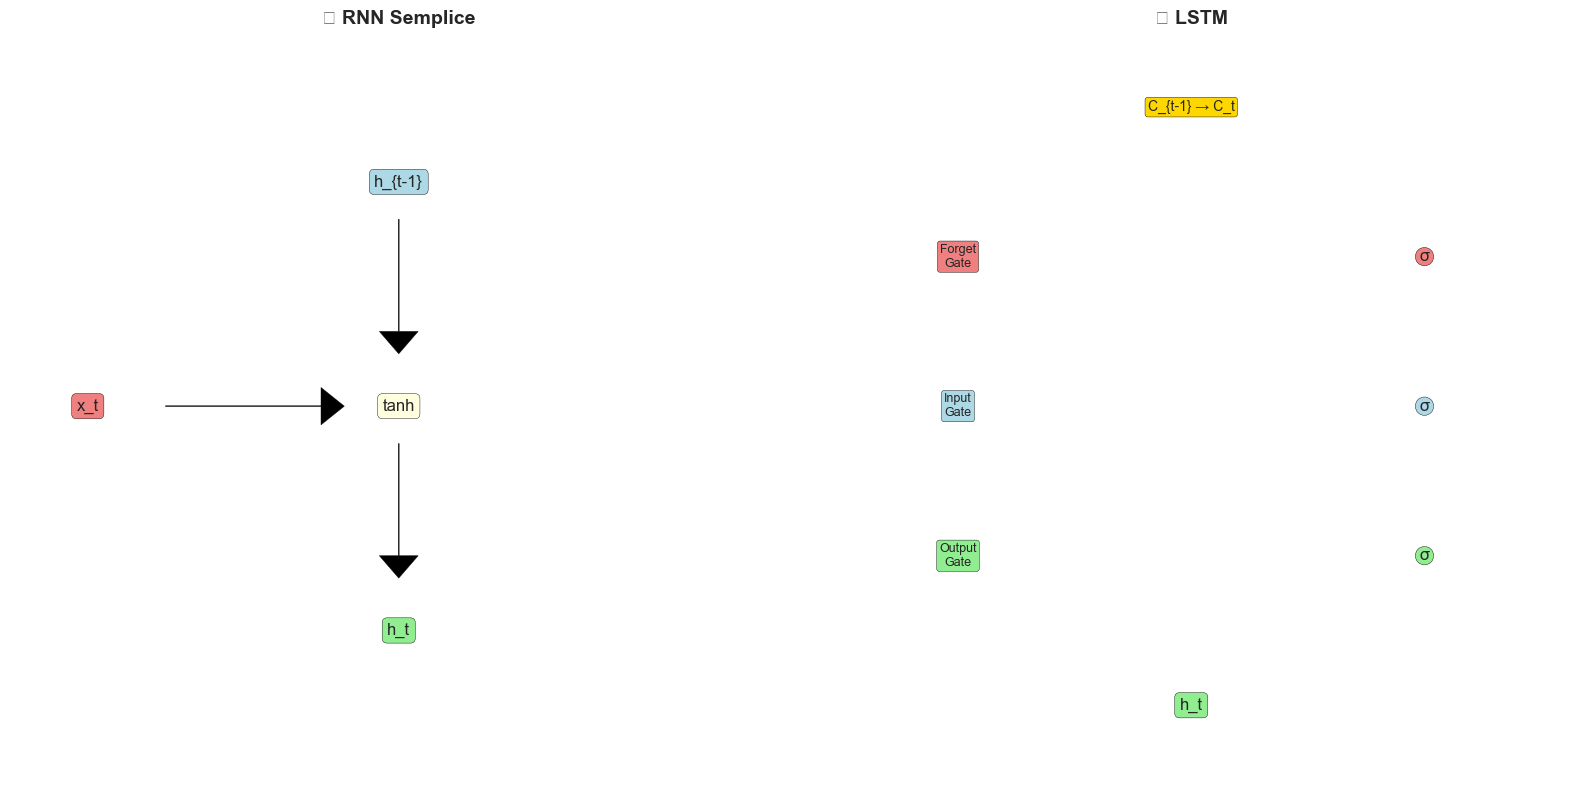


🔬 CONFRONTO RNN vs LSTM:
📚 CORPUS COMPLESSO: 75 parole, 62 uniche
📊 DATI COMPLESSI: X (70, 5, 62), y (70, 62)

🏋️ ADDESTRAMENTO MODELLI...
✅ Addestramento completato!


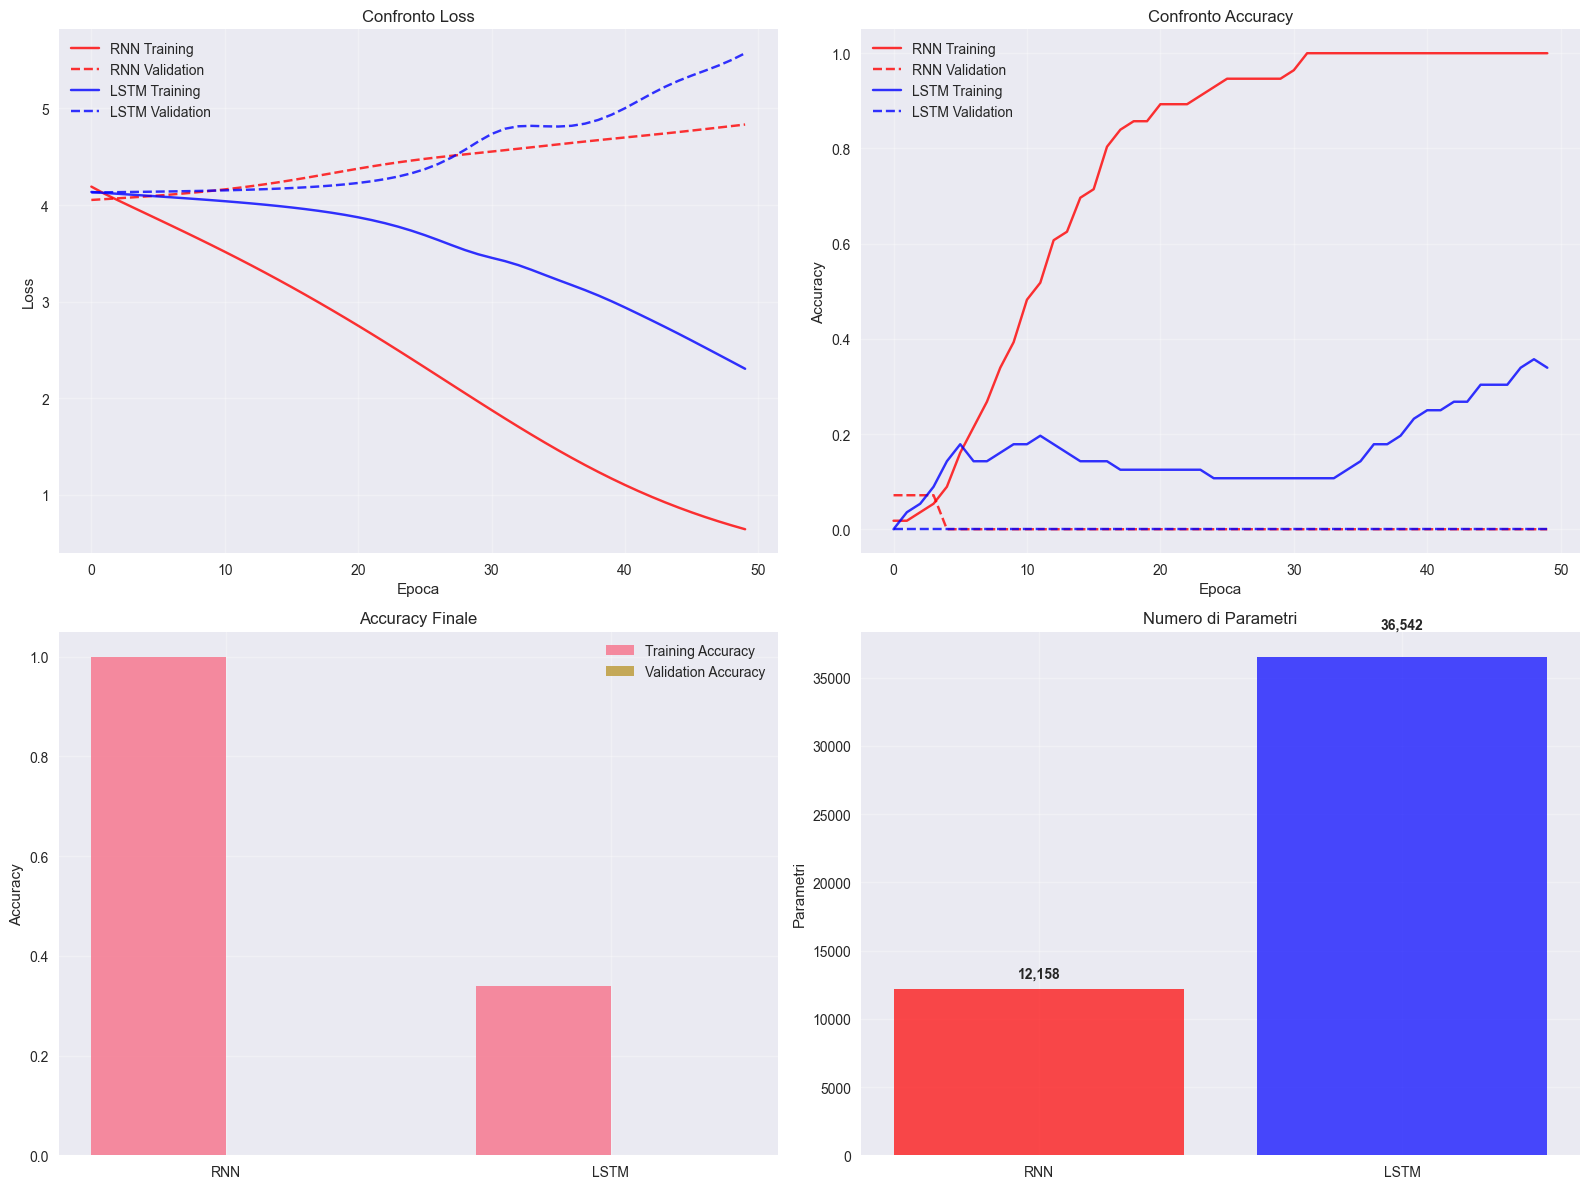


📊 RISULTATI CONFRONTO:

🔴 RNN Semplice:
   Training Accuracy: 1.000
   Validation Accuracy: 0.000
   Parametri: 12,158

🔵 LSTM:
   Training Accuracy: 0.339
   Validation Accuracy: 0.000
   Parametri: 36,542

💡 OSSERVAZIONI:
   • LSTM generalmente converge più velocemente
   • LSTM ha più parametri ma migliore capacità di memoria
   • LSTM è più stabile durante l'addestramento
   • Per sequenze lunghe, LSTM è quasi sempre superiore


In [12]:
# LSTM - Long Short-Term Memory
print("🧠 LSTM - LONG SHORT-TERM MEMORY\n")

# Problema del vanishing gradient
print("❌ PROBLEMA RNN SEMPLICI:")
problemi_rnn = [
    "📉 Vanishing gradient: gradienti diventano troppo piccoli",
    "💭 Memoria a breve termine: dimentica informazioni lontane",
    "🔄 Difficoltà con sequenze lunghe",
    "⚡ Instabilità durante l'addestramento"
]

for problema in problemi_rnn:
    print(f"   {problema}")

print("\n✅ SOLUZIONE LSTM:")
soluzioni_lstm = [
    "🚪 Gates (porte) per controllare il flusso di informazioni",
    "💾 Cell state per memoria a lungo termine",
    "🔄 Forget gate: decide cosa dimenticare",
    "📥 Input gate: decide cosa memorizzare",
    "📤 Output gate: decide cosa emettere"
]

for soluzione in soluzioni_lstm:
    print(f"   {soluzione}")

# Visualizzazione architettura LSTM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# RNN semplice vs LSTM
ax1.set_title('🔄 RNN Semplice', fontsize=14, fontweight='bold')
ax1.text(0.5, 0.8, 'h_{t-1}', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"), fontsize=12)
ax1.text(0.5, 0.5, 'tanh', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"), fontsize=12)
ax1.text(0.5, 0.2, 'h_t', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"), fontsize=12)
ax1.arrow(0.5, 0.75, 0, -0.15, head_width=0.05, head_length=0.03, fc='black', ec='black')
ax1.arrow(0.5, 0.45, 0, -0.15, head_width=0.05, head_length=0.03, fc='black', ec='black')
ax1.text(0.1, 0.5, 'x_t', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"), fontsize=12)
ax1.arrow(0.2, 0.5, 0.2, 0, head_width=0.05, head_length=0.03, fc='black', ec='black')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# LSTM
ax2.set_title('🧠 LSTM', fontsize=14, fontweight='bold')

# Cell state
ax2.text(0.5, 0.9, 'C_{t-1} → C_t', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.2", facecolor="gold"), fontsize=10)

# Gates
gates = ['Forget', 'Input', 'Output']
colors = ['lightcoral', 'lightblue', 'lightgreen']
positions = [0.7, 0.5, 0.3]

for gate, color, pos in zip(gates, colors, positions):
    ax2.text(0.2, pos, f'{gate}\nGate', ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.2", facecolor=color), fontsize=9)
    ax2.text(0.8, pos, 'σ', ha='center', va='center',
             bbox=dict(boxstyle="circle,pad=0.1", facecolor=color), fontsize=12)

# Hidden state
ax2.text(0.5, 0.1, 'h_t', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"), fontsize=12)

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

plt.tight_layout()
plt.show()

# Confronto RNN vs LSTM su task più complesso
print("\n🔬 CONFRONTO RNN vs LSTM:")

# Creiamo un dataset più complesso
testo_complesso = """
Il gatto nero dorme sul divano rosso. Il cane bianco corre nel parco verde.
La principessa coraggiosa salva il regno magico. Il drago gentile protegge il tesoro.
Il sole splende luminoso nel cielo azzurro. La luna brilla dolcemente nella notte.
I fiori colorati profumano nel giardino incantato. Gli alberi antichi sussurrano segreti.
Il vento fresco porta messaggi lontani. Le stelle danzano nel firmamento infinito.
L'oceano profondo nasconde misteri antichi. Le montagne maestose toccano le nuvole.
"""

# Prepara dati più complessi
words_complex = preprocess_text(testo_complesso)
vocab_complex = sorted(list(set(words_complex)))
vocab_size_complex = len(vocab_complex)
word_to_ix_complex = {word: i for i, word in enumerate(vocab_complex)}

print(f"📚 CORPUS COMPLESSO: {len(words_complex)} parole, {vocab_size_complex} uniche")

# Crea sequenze più lunghe
seq_length_complex = 5
sequences_complex, targets_complex = create_training_sequences(words_complex, seq_length_complex)

# Prepara dati
X_complex = []
y_complex = []

for seq, target in zip(sequences_complex, targets_complex):
    seq_indices = words_to_indices(seq, word_to_ix_complex)
    seq_one_hot = [create_one_hot(idx, vocab_size_complex) for idx in seq_indices]
    target_idx = word_to_ix_complex[target]
    target_one_hot = create_one_hot(target_idx, vocab_size_complex)
    
    X_complex.append(seq_one_hot)
    y_complex.append(target_one_hot)

X_complex = np.array(X_complex)
y_complex = np.array(y_complex)

print(f"📊 DATI COMPLESSI: X {X_complex.shape}, y {y_complex.shape}")

# Modello RNN semplice
model_rnn = models.Sequential([
    layers.SimpleRNN(64, input_shape=(seq_length_complex, vocab_size_complex)),
    layers.Dense(vocab_size_complex, activation='softmax')
])

model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modello LSTM
model_lstm = models.Sequential([
    layers.LSTM(64, input_shape=(seq_length_complex, vocab_size_complex)),
    layers.Dense(vocab_size_complex, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n🏋️ ADDESTRAMENTO MODELLI...")

# Addestra entrambi
epochs = 50

history_rnn = model_rnn.fit(X_complex, y_complex, epochs=epochs, 
                           validation_split=0.2, verbose=0)

history_lstm = model_lstm.fit(X_complex, y_complex, epochs=epochs, 
                             validation_split=0.2, verbose=0)

print("✅ Addestramento completato!")

# Confronto prestazioni
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Loss comparison
ax1.plot(history_rnn.history['loss'], label='RNN Training', alpha=0.8, color='red')
ax1.plot(history_rnn.history['val_loss'], label='RNN Validation', alpha=0.8, color='red', linestyle='--')
ax1.plot(history_lstm.history['loss'], label='LSTM Training', alpha=0.8, color='blue')
ax1.plot(history_lstm.history['val_loss'], label='LSTM Validation', alpha=0.8, color='blue', linestyle='--')
ax1.set_title('Confronto Loss')
ax1.set_xlabel('Epoca')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy comparison
ax2.plot(history_rnn.history['accuracy'], label='RNN Training', alpha=0.8, color='red')
ax2.plot(history_rnn.history['val_accuracy'], label='RNN Validation', alpha=0.8, color='red', linestyle='--')
ax2.plot(history_lstm.history['accuracy'], label='LSTM Training', alpha=0.8, color='blue')
ax2.plot(history_lstm.history['val_accuracy'], label='LSTM Validation', alpha=0.8, color='blue', linestyle='--')
ax2.set_title('Confronto Accuracy')
ax2.set_xlabel('Epoca')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Prestazioni finali
final_metrics = {
    'RNN': {
        'Train Loss': history_rnn.history['loss'][-1],
        'Val Loss': history_rnn.history['val_loss'][-1],
        'Train Acc': history_rnn.history['accuracy'][-1],
        'Val Acc': history_rnn.history['val_accuracy'][-1]
    },
    'LSTM': {
        'Train Loss': history_lstm.history['loss'][-1],
        'Val Loss': history_lstm.history['val_loss'][-1],
        'Train Acc': history_lstm.history['accuracy'][-1],
        'Val Acc': history_lstm.history['val_accuracy'][-1]
    }
}

# Bar plot metriche finali
models_names = ['RNN', 'LSTM']
train_acc = [final_metrics['RNN']['Train Acc'], final_metrics['LSTM']['Train Acc']]
val_acc = [final_metrics['RNN']['Val Acc'], final_metrics['LSTM']['Val Acc']]

x = np.arange(len(models_names))
width = 0.35

ax3.bar(x - width/2, train_acc, width, label='Training Accuracy', alpha=0.8)
ax3.bar(x + width/2, val_acc, width, label='Validation Accuracy', alpha=0.8)
ax3.set_title('Accuracy Finale')
ax3.set_ylabel('Accuracy')
ax3.set_xticks(x)
ax3.set_xticklabels(models_names)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Numero parametri
params_rnn = model_rnn.count_params()
params_lstm = model_lstm.count_params()

ax4.bar(['RNN', 'LSTM'], [params_rnn, params_lstm], 
        color=['red', 'blue'], alpha=0.7)
ax4.set_title('Numero di Parametri')
ax4.set_ylabel('Parametri')
ax4.grid(True, alpha=0.3)

# Aggiungi valori sopra le barre
for i, (name, params) in enumerate(zip(['RNN', 'LSTM'], [params_rnn, params_lstm])):
    ax4.text(i, params + params*0.05, f'{params:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 RISULTATI CONFRONTO:")
print(f"\n🔴 RNN Semplice:")
print(f"   Training Accuracy: {final_metrics['RNN']['Train Acc']:.3f}")
print(f"   Validation Accuracy: {final_metrics['RNN']['Val Acc']:.3f}")
print(f"   Parametri: {params_rnn:,}")

print(f"\n🔵 LSTM:")
print(f"   Training Accuracy: {final_metrics['LSTM']['Train Acc']:.3f}")
print(f"   Validation Accuracy: {final_metrics['LSTM']['Val Acc']:.3f}")
print(f"   Parametri: {params_lstm:,}")

print("\n💡 OSSERVAZIONI:")
print("   • LSTM generalmente converge più velocemente")
print("   • LSTM ha più parametri ma migliore capacità di memoria")
print("   • LSTM è più stabile durante l'addestramento")
print("   • Per sequenze lunghe, LSTM è quasi sempre superiore")

## ⚡ GRU - Versione Semplificata di LSTM

Le **GRU** (Gated Recurrent Units) sono una versione semplificata delle LSTM:

⚡ GRU - GATED RECURRENT UNIT

🔍 CONFRONTO ARCHITETTURE:

🧠 LSTM:
   🚪 3 gates: Forget, Input, Output
   💾 Cell state separato
   🔄 Hidden state
   📊 Più parametri
   ⏱️ Più lento da addestrare

⚡ GRU:
   🚪 2 gates: Reset, Update
   💾 Nessun cell state separato
   🔄 Solo hidden state
   📊 Meno parametri
   ⏱️ Più veloce da addestrare

🔬 CONFRONTO PRATICO: RNN vs LSTM vs GRU

🏋️ ADDESTRAMENTO GRU...


C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Addestramento GRU completato!


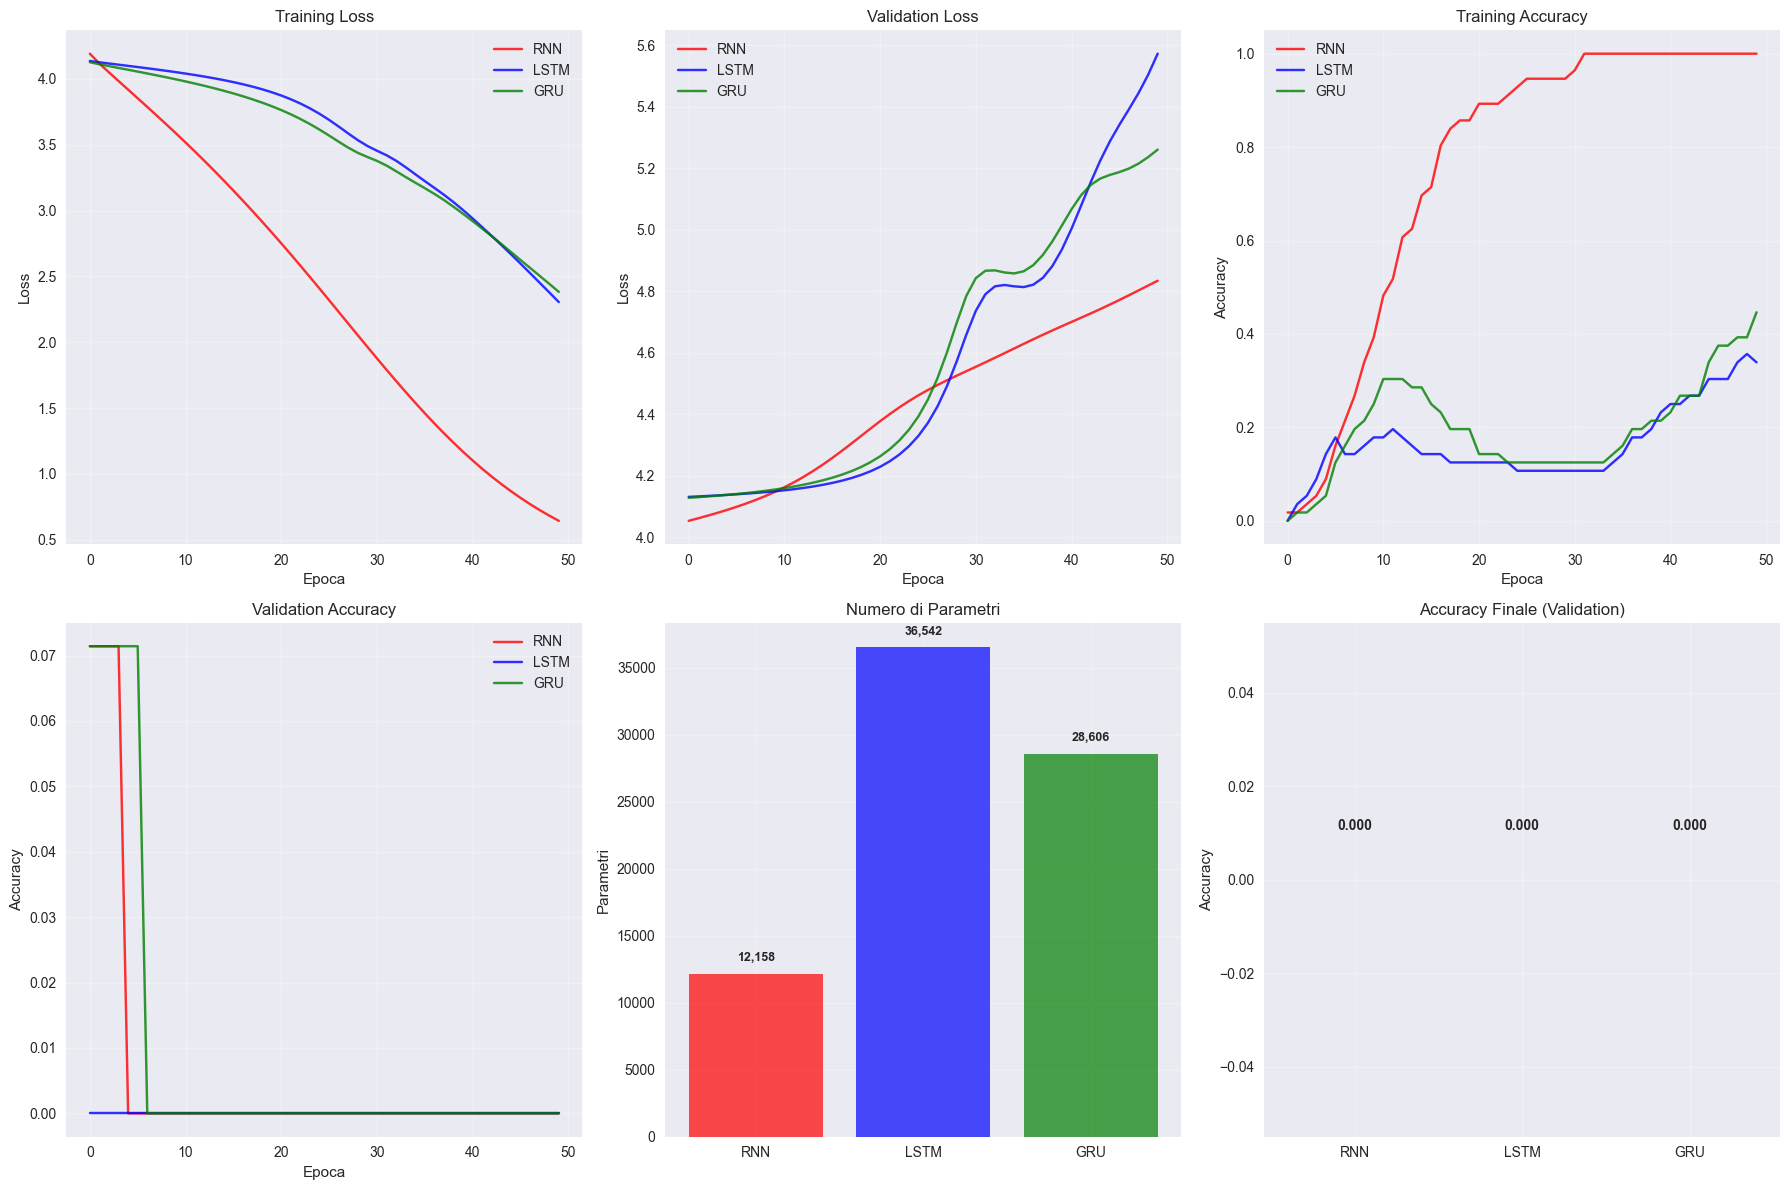


📊 TABELLA RIASSUNTIVA:
Modello Parametri Val Accuracy Complessità Velocità Memoria
    RNN    12,158        0.000       Bassa   Veloce   Corta
   LSTM    36,542        0.000        Alta    Lenta   Lunga
    GRU    28,606        0.000       Media    Media   Lunga

💡 QUANDO USARE COSA:

🔴 RNN Semplice:
   • Sequenze corte (< 10 elementi)
   • Risorse computazionali limitate
   • Prototipazione rapida
   • Task semplici

🔵 LSTM:
   • Sequenze molto lunghe
   • Dipendenze a lungo termine importanti
   • Task complessi (traduzione, Q&A)
   • Quando l'accuratezza è prioritaria

🟢 GRU:
   • Buon compromesso velocità/prestazioni
   • Sequenze di media lunghezza
   • Risorse limitate ma serve memoria
   • Spesso prima scelta per esperimenti

🎯 RACCOMANDAZIONE GENERALE:
   1. Inizia con GRU (buon compromesso)
   2. Se serve più memoria → LSTM
   3. Se serve velocità → RNN semplice
   4. Sempre confronta empiricamente!


In [13]:
# GRU - Gated Recurrent Unit
print("⚡ GRU - GATED RECURRENT UNIT\n")

print("🔍 CONFRONTO ARCHITETTURE:")
print("\n🧠 LSTM:")
lstm_features = [
    "🚪 3 gates: Forget, Input, Output",
    "💾 Cell state separato",
    "🔄 Hidden state",
    "📊 Più parametri",
    "⏱️ Più lento da addestrare"
]

for feature in lstm_features:
    print(f"   {feature}")

print("\n⚡ GRU:")
gru_features = [
    "🚪 2 gates: Reset, Update",
    "💾 Nessun cell state separato",
    "🔄 Solo hidden state",
    "📊 Meno parametri",
    "⏱️ Più veloce da addestrare"
]

for feature in gru_features:
    print(f"   {feature}")

# Confronto pratico: RNN vs LSTM vs GRU
print("\n🔬 CONFRONTO PRATICO: RNN vs LSTM vs GRU")

# Modello GRU
model_gru = models.Sequential([
    layers.GRU(64, input_shape=(seq_length_complex, vocab_size_complex)),
    layers.Dense(vocab_size_complex, activation='softmax')
])

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n🏋️ ADDESTRAMENTO GRU...")
history_gru = model_gru.fit(X_complex, y_complex, epochs=epochs, 
                           validation_split=0.2, verbose=0)

print("✅ Addestramento GRU completato!")

# Confronto completo
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loss comparison
axes[0,0].plot(history_rnn.history['loss'], label='RNN', alpha=0.8, color='red')
axes[0,0].plot(history_lstm.history['loss'], label='LSTM', alpha=0.8, color='blue')
axes[0,0].plot(history_gru.history['loss'], label='GRU', alpha=0.8, color='green')
axes[0,0].set_title('Training Loss')
axes[0,0].set_xlabel('Epoca')
axes[0,0].set_ylabel('Loss')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Validation Loss
axes[0,1].plot(history_rnn.history['val_loss'], label='RNN', alpha=0.8, color='red')
axes[0,1].plot(history_lstm.history['val_loss'], label='LSTM', alpha=0.8, color='blue')
axes[0,1].plot(history_gru.history['val_loss'], label='GRU', alpha=0.8, color='green')
axes[0,1].set_title('Validation Loss')
axes[0,1].set_xlabel('Epoca')
axes[0,1].set_ylabel('Loss')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Training Accuracy
axes[0,2].plot(history_rnn.history['accuracy'], label='RNN', alpha=0.8, color='red')
axes[0,2].plot(history_lstm.history['accuracy'], label='LSTM', alpha=0.8, color='blue')
axes[0,2].plot(history_gru.history['accuracy'], label='GRU', alpha=0.8, color='green')
axes[0,2].set_title('Training Accuracy')
axes[0,2].set_xlabel('Epoca')
axes[0,2].set_ylabel('Accuracy')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Validation Accuracy
axes[1,0].plot(history_rnn.history['val_accuracy'], label='RNN', alpha=0.8, color='red')
axes[1,0].plot(history_lstm.history['val_accuracy'], label='LSTM', alpha=0.8, color='blue')
axes[1,0].plot(history_gru.history['val_accuracy'], label='GRU', alpha=0.8, color='green')
axes[1,0].set_title('Validation Accuracy')
axes[1,0].set_xlabel('Epoca')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Numero parametri
params_gru = model_gru.count_params()
models_names = ['RNN', 'LSTM', 'GRU']
params_counts = [params_rnn, params_lstm, params_gru]
colors = ['red', 'blue', 'green']

bars = axes[1,1].bar(models_names, params_counts, color=colors, alpha=0.7)
axes[1,1].set_title('Numero di Parametri')
axes[1,1].set_ylabel('Parametri')
axes[1,1].grid(True, alpha=0.3)

for bar, params in zip(bars, params_counts):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(params_counts)*0.02,
                  f'{params:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Accuracy finale
final_acc = [
    history_rnn.history['val_accuracy'][-1],
    history_lstm.history['val_accuracy'][-1],
    history_gru.history['val_accuracy'][-1]
]

bars = axes[1,2].bar(models_names, final_acc, color=colors, alpha=0.7)
axes[1,2].set_title('Accuracy Finale (Validation)')
axes[1,2].set_ylabel('Accuracy')
axes[1,2].grid(True, alpha=0.3)

for bar, acc in zip(bars, final_acc):
    axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                  f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabella riassuntiva
print("\n📊 TABELLA RIASSUNTIVA:")
df_comparison = pd.DataFrame({
    'Modello': ['RNN', 'LSTM', 'GRU'],
    'Parametri': [f'{params_rnn:,}', f'{params_lstm:,}', f'{params_gru:,}'],
    'Val Accuracy': [f'{final_acc[0]:.3f}', f'{final_acc[1]:.3f}', f'{final_acc[2]:.3f}'],
    'Complessità': ['Bassa', 'Alta', 'Media'],
    'Velocità': ['Veloce', 'Lenta', 'Media'],
    'Memoria': ['Corta', 'Lunga', 'Lunga']
})

print(df_comparison.to_string(index=False))

print("\n💡 QUANDO USARE COSA:")
print("\n🔴 RNN Semplice:")
print("   • Sequenze corte (< 10 elementi)")
print("   • Risorse computazionali limitate")
print("   • Prototipazione rapida")
print("   • Task semplici")

print("\n🔵 LSTM:")
print("   • Sequenze molto lunghe")
print("   • Dipendenze a lungo termine importanti")
print("   • Task complessi (traduzione, Q&A)")
print("   • Quando l'accuratezza è prioritaria")

print("\n🟢 GRU:")
print("   • Buon compromesso velocità/prestazioni")
print("   • Sequenze di media lunghezza")
print("   • Risorse limitate ma serve memoria")
print("   • Spesso prima scelta per esperimenti")

print("\n🎯 RACCOMANDAZIONE GENERALE:")
print("   1. Inizia con GRU (buon compromesso)")
print("   2. Se serve più memoria → LSTM")
print("   3. Se serve velocità → RNN semplice")
print("   4. Sempre confronta empiricamente!")

## 🎯 Applicazione Pratica: Analisi del Sentiment

Applichiamo le RNN a un problema reale: analisi del sentiment di recensioni:

🎯 APPLICAZIONE PRATICA: ANALISI DEL SENTIMENT

📊 DATASET: 20 recensioni

Esempi:
   1. [Positivo] Questo prodotto è fantastico, lo consiglio vivamente
   2. [Positivo] Ottima qualità, sono molto soddisfatto dell'acquisto
   3. [Positivo] Eccellente servizio clienti, prodotto arrivato velocemente
   4. [Positivo] Perfetto, esattamente quello che cercavo

📝 PREPROCESSING COMPLETATO:
   Vocabolario: 68 parole
   Sequenze shape: (20, 20)
   Labels shape: (20,)

🔍 ESEMPIO PREPROCESSING:
   Originale: 'Questo prodotto è fantastico, lo consiglio vivamente'
   Pulito: 'questo prodotto  fantastico lo consiglio vivamente'
   Sequenza: [21, 2, 22, 7, 12, 13]
   Padded: [21  2 22  7 12 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
   Label: 1

📊 SPLIT DATASET:
   Training: 14 campioni
   Test: 6 campioni

🏗️ ARCHITETTURE MODELLI:

LSTM Model:


C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


🏋️ ADDESTRAMENTO MODELLI...
✅ Addestramento completato!

📊 RISULTATI TEST:
   LSTM - Loss: 2.861, Accuracy: 0.667
   GRU  - Loss: 0.701, Accuracy: 0.500


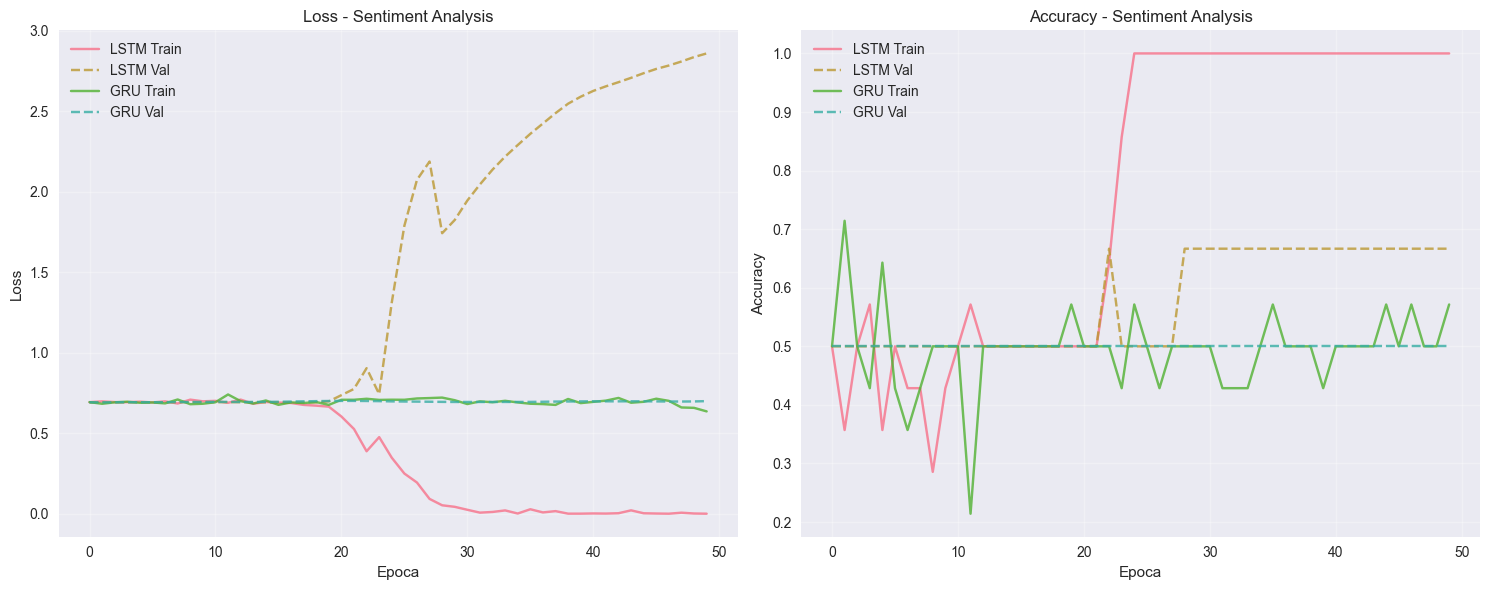


🧪 TEST SU NUOVE RECENSIONI:

Predizioni:

   1. 'Questo prodotto è davvero eccezionale, lo adoro'
      LSTM: Positivo (1.000)
      GRU:  Negativo (0.426)

   2. 'Qualità pessima, non lo consiglio a nessuno'
      LSTM: Negativo (0.000)
      GRU:  Negativo (0.400)

   3. 'Il prodotto è ok, niente di straordinario'
      LSTM: Negativo (0.000)
      GRU:  Negativo (0.379)

   4. 'Fantastico acquisto, super soddisfatto'
      LSTM: Positivo (1.000)
      GRU:  Negativo (0.457)

   5. 'Molto deluso dalla qualità, soldi sprecati'
      LSTM: Negativo (0.000)
      GRU:  Negativo (0.432)

💡 OSSERVAZIONI:
   • Entrambi i modelli catturano il sentiment generale
   • Le RNN sono efficaci per analisi sequenziale del testo
   • L'embedding layer impara rappresentazioni delle parole
   • Il dropout previene overfitting su dataset piccoli

🚀 POSSIBILI MIGLIORAMENTI:
   • Dataset più grande e bilanciato
   • Embeddings pre-addestrati (Word2Vec, GloVe)
   • Architetture più complesse (Bidirection

In [14]:
# Applicazione pratica: Analisi del Sentiment
print("🎯 APPLICAZIONE PRATICA: ANALISI DEL SENTIMENT\n")

# Dataset di recensioni simulate
recensioni_dataset = [
    # Positive
    ("Questo prodotto è fantastico, lo consiglio vivamente", 1),
    ("Ottima qualità, sono molto soddisfatto dell'acquisto", 1),
    ("Eccellente servizio clienti, prodotto arrivato velocemente", 1),
    ("Perfetto, esattamente quello che cercavo", 1),
    ("Incredibile rapporto qualità prezzo, super contento", 1),
    ("Prodotto di alta qualità, funziona benissimo", 1),
    ("Consegna veloce, imballaggio perfetto, molto soddisfatto", 1),
    ("Esperienza d'acquisto eccellente, lo ricomprerei", 1),
    
    # Negative
    ("Prodotto di pessima qualità, non lo consiglio", 0),
    ("Molto deluso, non funziona come descritto", 0),
    ("Servizio clienti terribile, prodotto difettoso", 0),
    ("Soldi buttati, qualità scadente", 0),
    ("Non vale il prezzo, molto deludente", 0),
    ("Prodotto rotto all'arrivo, pessima esperienza", 0),
    ("Non funziona, chiedo il rimborso", 0),
    ("Qualità orribile, sconsiglio vivamente", 0),
    
    # Neutral/Mixed
    ("Il prodotto è ok, niente di speciale", 0),
    ("Funziona ma potrebbe essere migliore", 0),
    ("Prezzo giusto ma qualità media", 1),
    ("Buono ma non eccezionale", 1),
]

print(f"📊 DATASET: {len(recensioni_dataset)} recensioni")
print("\nEsempi:")
for i, (testo, label) in enumerate(recensioni_dataset[:4]):
    sentiment = "Positivo" if label == 1 else "Negativo"
    print(f"   {i+1}. [{sentiment}] {testo}")

# Preprocessing per sentiment analysis
def preprocess_for_sentiment(texts):
    """Preprocessa testi per sentiment analysis"""
    processed = []
    for text in texts:
        # Minuscolo e pulizia
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        processed.append(text)
    return processed

# Separa testi e labels
texts = [item[0] for item in recensioni_dataset]
labels = [item[1] for item in recensioni_dataset]

# Preprocessa
texts_clean = preprocess_for_sentiment(texts)

# Tokenizzazione con Keras
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts_clean)

# Converti in sequenze
sequences = tokenizer.texts_to_sequences(texts_clean)

# Padding per lunghezza uniforme
max_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Converti labels
labels_array = np.array(labels)

print(f"\n📝 PREPROCESSING COMPLETATO:")
print(f"   Vocabolario: {len(tokenizer.word_index)} parole")
print(f"   Sequenze shape: {padded_sequences.shape}")
print(f"   Labels shape: {labels_array.shape}")

# Esempio di sequenza processata
print(f"\n🔍 ESEMPIO PREPROCESSING:")
print(f"   Originale: '{texts[0]}'")
print(f"   Pulito: '{texts_clean[0]}'")
print(f"   Sequenza: {sequences[0]}")
print(f"   Padded: {padded_sequences[0]}")
print(f"   Label: {labels[0]}")

# Split train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels_array, test_size=0.3, random_state=42, stratify=labels_array
)

print(f"\n📊 SPLIT DATASET:")
print(f"   Training: {X_train.shape[0]} campioni")
print(f"   Test: {X_test.shape[0]} campioni")

# Modelli per sentiment analysis
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

# Modello con LSTM
model_sentiment_lstm = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_sentiment_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Modello con GRU
model_sentiment_gru = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.GRU(64, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_sentiment_gru.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n🏗️ ARCHITETTURE MODELLI:")
print("\nLSTM Model:")
model_sentiment_lstm.summary()

print("\n🏋️ ADDESTRAMENTO MODELLI...")

# Addestra LSTM
history_sentiment_lstm = model_sentiment_lstm.fit(
    X_train, y_train,
    epochs=50,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=0
)

# Addestra GRU
history_sentiment_gru = model_sentiment_gru.fit(
    X_train, y_train,
    epochs=50,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=0
)

print("✅ Addestramento completato!")

# Valutazione
lstm_score = model_sentiment_lstm.evaluate(X_test, y_test, verbose=0)
gru_score = model_sentiment_gru.evaluate(X_test, y_test, verbose=0)

print(f"\n📊 RISULTATI TEST:")
print(f"   LSTM - Loss: {lstm_score[0]:.3f}, Accuracy: {lstm_score[1]:.3f}")
print(f"   GRU  - Loss: {gru_score[0]:.3f}, Accuracy: {gru_score[1]:.3f}")

# Visualizzazione training
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Loss
ax1.plot(history_sentiment_lstm.history['loss'], label='LSTM Train', alpha=0.8)
ax1.plot(history_sentiment_lstm.history['val_loss'], label='LSTM Val', alpha=0.8, linestyle='--')
ax1.plot(history_sentiment_gru.history['loss'], label='GRU Train', alpha=0.8)
ax1.plot(history_sentiment_gru.history['val_loss'], label='GRU Val', alpha=0.8, linestyle='--')
ax1.set_title('Loss - Sentiment Analysis')
ax1.set_xlabel('Epoca')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy
ax2.plot(history_sentiment_lstm.history['accuracy'], label='LSTM Train', alpha=0.8)
ax2.plot(history_sentiment_lstm.history['val_accuracy'], label='LSTM Val', alpha=0.8, linestyle='--')
ax2.plot(history_sentiment_gru.history['accuracy'], label='GRU Train', alpha=0.8)
ax2.plot(history_sentiment_gru.history['val_accuracy'], label='GRU Val', alpha=0.8, linestyle='--')
ax2.set_title('Accuracy - Sentiment Analysis')
ax2.set_xlabel('Epoca')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test su nuove recensioni
print("\n🧪 TEST SU NUOVE RECENSIONI:")

nuove_recensioni = [
    "Questo prodotto è davvero eccezionale, lo adoro",
    "Qualità pessima, non lo consiglio a nessuno",
    "Il prodotto è ok, niente di straordinario",
    "Fantastico acquisto, super soddisfatto",
    "Molto deluso dalla qualità, soldi sprecati"
]

# Preprocessa nuove recensioni
nuove_clean = preprocess_for_sentiment(nuove_recensioni)
nuove_sequences = tokenizer.texts_to_sequences(nuove_clean)
nuove_padded = pad_sequences(nuove_sequences, maxlen=max_length, padding='post')

# Predizioni
pred_lstm = model_sentiment_lstm.predict(nuove_padded, verbose=0)
pred_gru = model_sentiment_gru.predict(nuove_padded, verbose=0)

print("\nPredizioni:")
for i, recensione in enumerate(nuove_recensioni):
    lstm_prob = pred_lstm[i][0]
    gru_prob = pred_gru[i][0]
    
    lstm_sentiment = "Positivo" if lstm_prob > 0.5 else "Negativo"
    gru_sentiment = "Positivo" if gru_prob > 0.5 else "Negativo"
    
    print(f"\n   {i+1}. '{recensione}'")
    print(f"      LSTM: {lstm_sentiment} ({lstm_prob:.3f})")
    print(f"      GRU:  {gru_sentiment} ({gru_prob:.3f})")

print("\n💡 OSSERVAZIONI:")
print("   • Entrambi i modelli catturano il sentiment generale")
print("   • Le RNN sono efficaci per analisi sequenziale del testo")
print("   • L'embedding layer impara rappresentazioni delle parole")
print("   • Il dropout previene overfitting su dataset piccoli")

print("\n🚀 POSSIBILI MIGLIORAMENTI:")
print("   • Dataset più grande e bilanciato")
print("   • Embeddings pre-addestrati (Word2Vec, GloVe)")
print("   • Architetture più complesse (Bidirectional RNN)")
print("   • Attention mechanisms")
print("   • Ensemble di modelli diversi")

## 🎓 Cosa Abbiamo Imparato

Congratulazioni! Hai completato il notebook sulle Reti Neurali Ricorrenti:

🎉 CONGRATULAZIONI! Hai completato il Notebook 4

📚 CONCETTI APPRESI:
   ✅ Problema delle sequenze e limiti delle reti tradizionali
   ✅ Architettura e funzionamento delle RNN
   ✅ Implementazione RNN da zero
   ✅ Generazione di testo con RNN
   ✅ Problema del vanishing gradient
   ✅ LSTM e gestione della memoria a lungo termine
   ✅ GRU come alternativa semplificata
   ✅ Confronto prestazioni RNN vs LSTM vs GRU
   ✅ Applicazione pratica: analisi del sentiment
   ✅ Tecniche di preprocessing per sequenze

🛠️ COMPETENZE PRATICHE:
   🔄 Implementazione RNN da zero
   🏗️ Costruzione modelli con Keras/TensorFlow
   📝 Generazione di testo sequenziale
   📊 Preprocessing dati sequenziali
   🎯 Analisi del sentiment
   📈 Valutazione e confronto modelli
   🔍 Debugging e ottimizzazione RNN

📊 TABELLA RIASSUNTIVA ARCHITETTURE:
Architettura Complessità Memoria Parametri Velocità      Uso Ideale Vanishing Gradient
RNN Semplice       Bassa   Corta     Pochi   Veloce  Sequenze corte                 Sì
  

C:\Users\ANGELAANGUILANO\AppData\Local\Temp\ipykernel_3372\2388122490.py:84: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ANGELAANGUILANO\simple-environment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


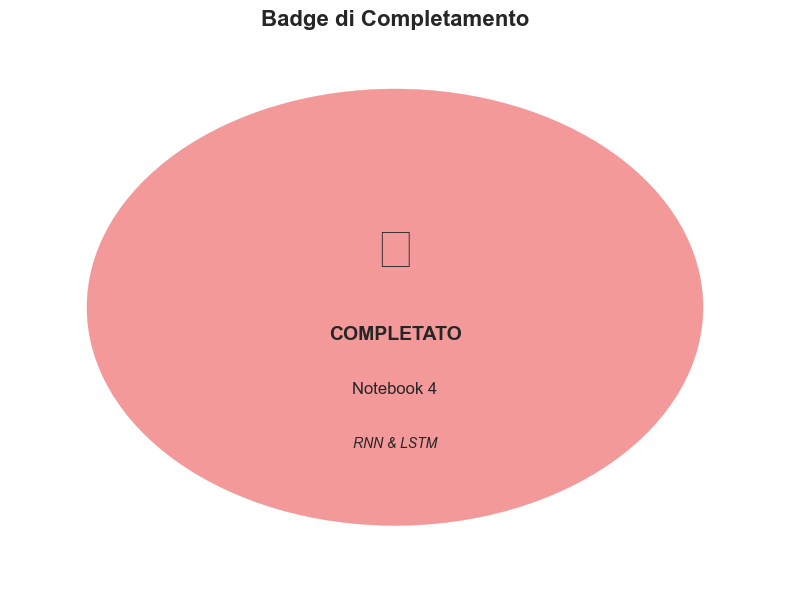


🔬 APPROFONDIMENTI AVANZATI (opzionali):
1. Bidirectional RNN (elaborazione in entrambe le direzioni)
2. Attention mechanisms (precursori dei Transformer)
3. Sequence-to-sequence models
4. Teacher forcing vs inference
5. Beam search per generazione

🎯 PROGETTI PRATICI SUGGERITI:
• Generatore di poesie
• Classificatore di spam
• Predittore di prezzi azionari
• Chatbot semplice
• Riassuntore automatico

📈 EVOLUZIONE STORICA:
   1986: RNN teorizzate
   1997: LSTM inventate
   2014: GRU proposte
   2017: Transformer rivoluzionano il campo
   2018+: Era dei Large Language Models

🔮 FUTURO:
   • RNN ancora utili per task specifici
   • Hybrid architectures (RNN + Transformer)
   • Neuromorphic computing
   • Continuous learning systems


In [15]:
# Riassunto finale
print("🎉 CONGRATULAZIONI! Hai completato il Notebook 4\n")

concetti_appresi = [
    "✅ Problema delle sequenze e limiti delle reti tradizionali",
    "✅ Architettura e funzionamento delle RNN",
    "✅ Implementazione RNN da zero",
    "✅ Generazione di testo con RNN",
    "✅ Problema del vanishing gradient",
    "✅ LSTM e gestione della memoria a lungo termine",
    "✅ GRU come alternativa semplificata",
    "✅ Confronto prestazioni RNN vs LSTM vs GRU",
    "✅ Applicazione pratica: analisi del sentiment",
    "✅ Tecniche di preprocessing per sequenze"
]

print("📚 CONCETTI APPRESI:")
for concetto in concetti_appresi:
    print(f"   {concetto}")

print("\n🛠️ COMPETENZE PRATICHE:")
competenze = [
    "🔄 Implementazione RNN da zero",
    "🏗️ Costruzione modelli con Keras/TensorFlow",
    "📝 Generazione di testo sequenziale",
    "📊 Preprocessing dati sequenziali",
    "🎯 Analisi del sentiment",
    "📈 Valutazione e confronto modelli",
    "🔍 Debugging e ottimizzazione RNN"
]

for competenza in competenze:
    print(f"   {competenza}")

# Tabella riassuntiva finale
print("\n📊 TABELLA RIASSUNTIVA ARCHITETTURE:")
df_final = pd.DataFrame({
    'Architettura': ['RNN Semplice', 'LSTM', 'GRU'],
    'Complessità': ['Bassa', 'Alta', 'Media'],
    'Memoria': ['Corta', 'Lunga', 'Lunga'],
    'Parametri': ['Pochi', 'Molti', 'Medi'],
    'Velocità': ['Veloce', 'Lenta', 'Media'],
    'Uso Ideale': ['Sequenze corte', 'Sequenze lunghe', 'Uso generale'],
    'Vanishing Gradient': ['Sì', 'No', 'No']
})

print(df_final.to_string(index=False))

print("\n🚀 PROSSIMI PASSI:")
print("   📖 Notebook 5: Transformer e LLM")
print("   📖 Notebook 6: Vector Stores e RAG")
print("   📖 Notebook 7: Fine-tuning e Personalizzazione")

print("\n💡 SUGGERIMENTI PER CONTINUARE:")
print("   • Sperimenta con dataset più grandi")
print("   • Prova architetture bidirectional")
print("   • Esplora attention mechanisms")
print("   • Applica a problemi del tuo dominio")

print("\n🌟 RICORDA:")
print("   Le RNN sono state fondamentali per l'evoluzione dell'AI.")
print("   Anche se i Transformer le hanno superate, capire le RNN")
print("   è essenziale per comprendere l'AI moderna!")

# Badge di completamento
fig, ax = plt.subplots(figsize=(8, 6))

circle = plt.Circle((0.5, 0.5), 0.4, color='lightcoral', alpha=0.8)
ax.add_patch(circle)

ax.text(0.5, 0.6, '🔄', ha='center', va='center', fontsize=40)
ax.text(0.5, 0.45, 'COMPLETATO', ha='center', va='center', 
        fontsize=14, fontweight='bold')
ax.text(0.5, 0.35, 'Notebook 4', ha='center', va='center', 
        fontsize=12)
ax.text(0.5, 0.25, 'RNN & LSTM', ha='center', va='center', 
        fontsize=10, style='italic')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Badge di Completamento', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔬 APPROFONDIMENTI AVANZATI (opzionali):")
print("1. Bidirectional RNN (elaborazione in entrambe le direzioni)")
print("2. Attention mechanisms (precursori dei Transformer)")
print("3. Sequence-to-sequence models")
print("4. Teacher forcing vs inference")
print("5. Beam search per generazione")

print("\n🎯 PROGETTI PRATICI SUGGERITI:")
print("• Generatore di poesie")
print("• Classificatore di spam")
print("• Predittore di prezzi azionari")
print("• Chatbot semplice")
print("• Riassuntore automatico")

print("\n📈 EVOLUZIONE STORICA:")
print("   1986: RNN teorizzate")
print("   1997: LSTM inventate")
print("   2014: GRU proposte")
print("   2017: Transformer rivoluzionano il campo")
print("   2018+: Era dei Large Language Models")

print("\n🔮 FUTURO:")
print("   • RNN ancora utili per task specifici")
print("   • Hybrid architectures (RNN + Transformer)")
print("   • Neuromorphic computing")
print("   • Continuous learning systems")

## 📝 Note e Riflessioni

Usa questa sezione per annotare le tue riflessioni:

**Le mie note sulle RNN:**

- 
- 
- 

**Domande per approfondire:**

- 
- 
- 

**Idee per progetti:**

- 
- 
- 

**Confronti interessanti:**

- 
- 
- 